# Project name: Amazon sales analysis

# Importing immportant libraries for this problem.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv("Amazon Sales Records (2).csv")

In [5]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [6]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
df.describe()


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [8]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [9]:
df['Order_Date']=pd.to_datetime(df['Order Date'])

# Here is we are changing the datatype of Order Date object to datetime.

In [10]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date                object
Order ID                   int64
Ship Date                 object
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
Order_Date        datetime64[ns]
dtype: object

In [11]:
df["Year"]=df['Order_Date'].dt.year
df["Month"]=df['Order_Date'].dt.month

# Here is we are seperate the month and year for the given task.

In [12]:
monthly_sales=df.groupby(['Year','Month'])['Total Revenue'].sum()
yearly_sales=df.groupby(['Year'])['Total Revenue'].sum()
yearly_monthly_sales=df.groupby(['Year','Month'])['Total Revenue'].sum()

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Year-Month', ylabel='Total Revenue'>

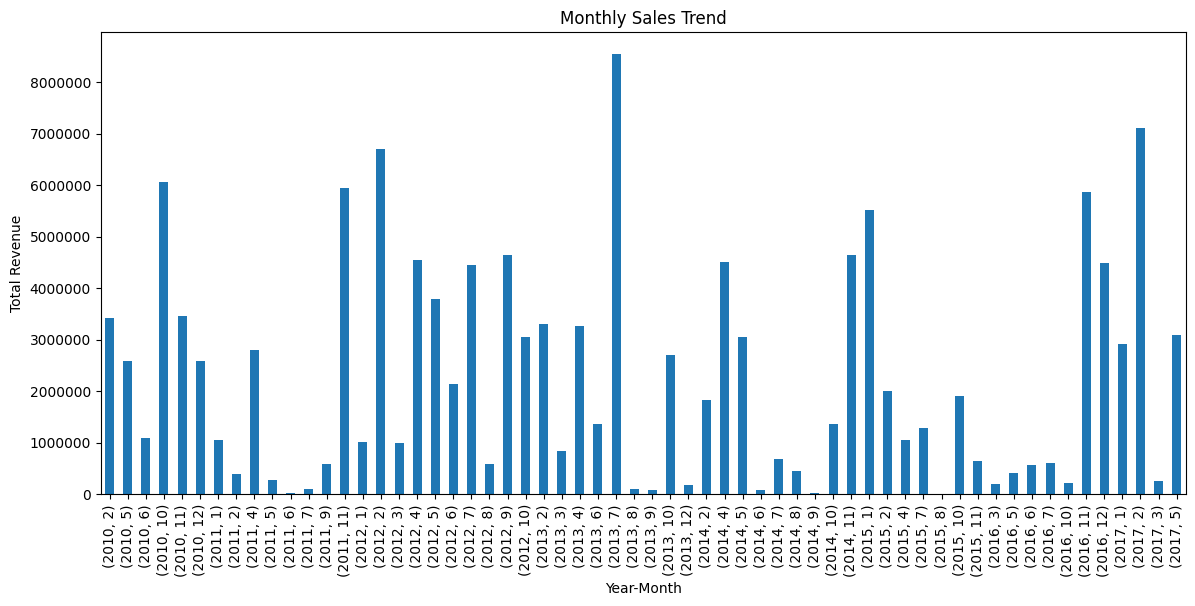

In [24]:
plt.figure(figsize=(14,6))
plt.plot(131)
plt.ticklabel_format(style='plain')
monthly_sales.plot(kind="bar",title='Monthly Sales Trend',xlabel='Year-Month',ylabel='Total Revenue')

# In the monthly sales that we can see the maximum revenue is coming in the month of july 2013 and minimum revenue is coming in june 2011 and aug 2015

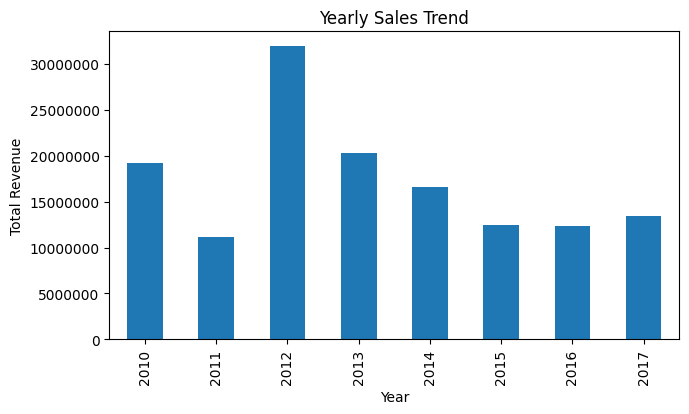

In [28]:
plt.figure(figsize=(25,4))
plt.subplot(132)
plt.ticklabel_format(style='plain')
yearly_sales.plot(kind="bar",title='Yearly Sales Trend',xlabel='Year',ylabel='Total Revenue')
plt.show()

# In this visual we are looking the yaerly sales and we are clearly see that the maximum revenue is coming the yaer of 2012 and the minimum is coming from in 2011

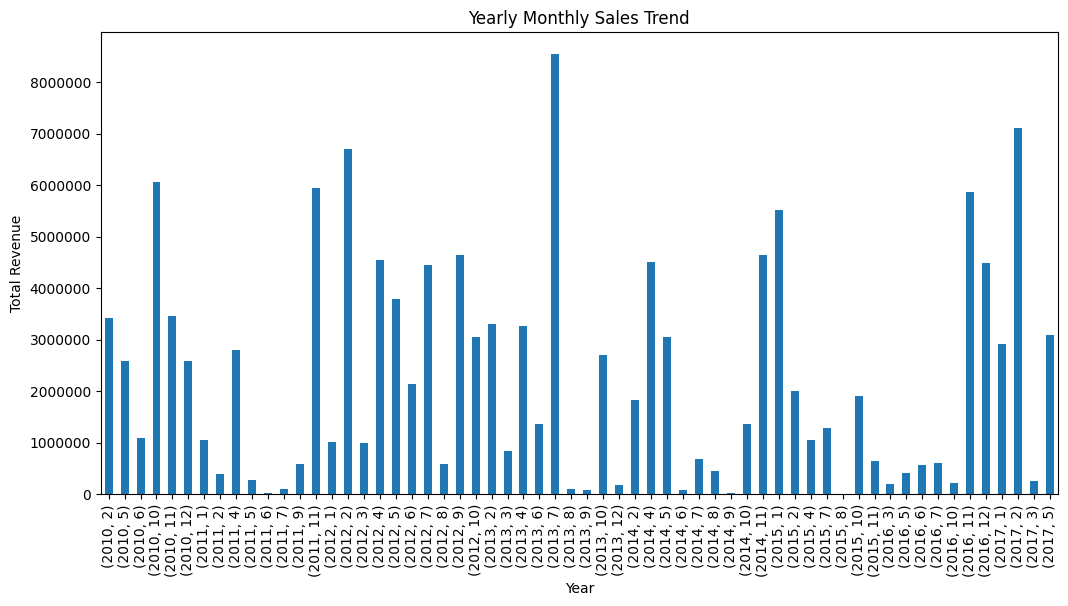

In [72]:
plt.figure(figsize=(42,6))
plt.subplot(133)
plt.ticklabel_format(style='plain')
yearly_monthly_sales.plot(kind="bar",title="Yearly Monthly Sales Trend",xlabel='Year',ylabel='Total Revenue')
plt.show()

# In the monthly sales that we can see the maximum revenue is coming in the month of july 2013 and minimum revenue is coming in june 2011 and aug 2015

In [30]:
average_sales=df.groupby(['Year'])['Total Revenue'].mean()
total_profit=df.groupby(['Year'])['Total Profit'].sum()

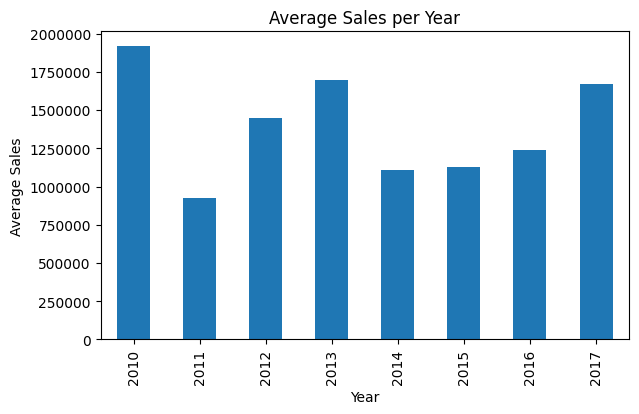

In [31]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.ticklabel_format(style='plain')
average_sales.plot(kind='bar',title='Average Sales per Year',xlabel='Year',ylabel='Average Sales')
plt.show()

# Here we can see clearly that the in year of 2010 the average sale is maximum

<Axes: title={'center': 'Total Profit per Year'}, xlabel='Year', ylabel='Total Profit'>

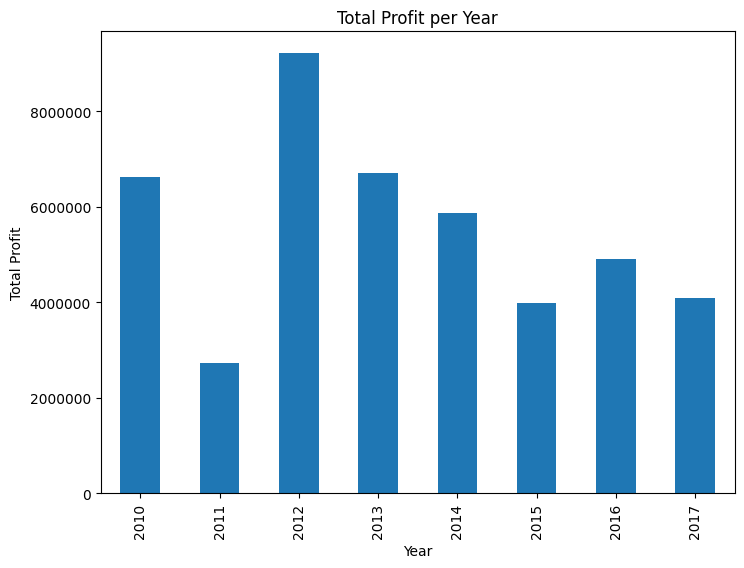

In [32]:
plt.figure(figsize=(18,6))
plt.subplot(122)
plt.ticklabel_format(style='plain')
total_profit.plot(kind='bar',title='Total Profit per Year',xlabel='Year',ylabel='Total Profit')

# Here is we can see the maximum profit is coming in the year of 2012 and the minimum profit is in 2011

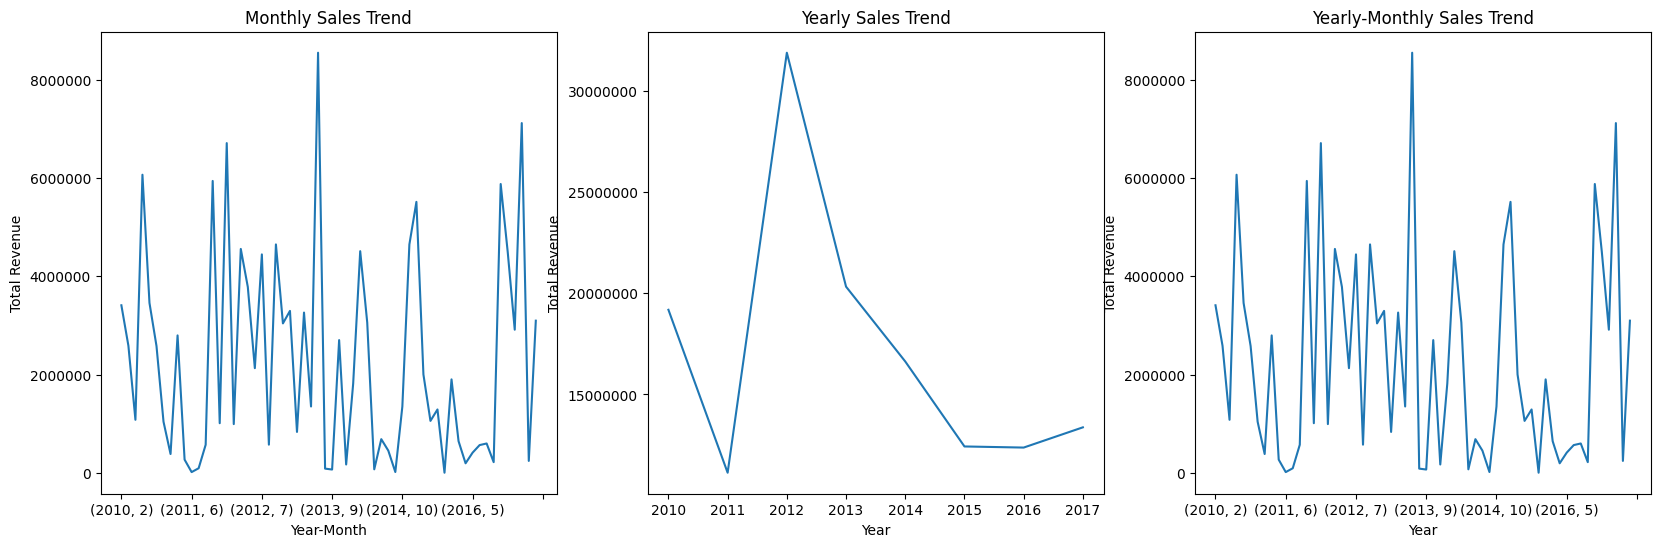

In [49]:
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.ticklabel_format(style='plain')
monthly_sales.plot(title='Monthly Sales Trend',xlabel='Year-Month',ylabel='Total Revenue')
plt.subplot(132)
plt.ticklabel_format(style='plain')
yearly_sales.plot(title='Yearly Sales Trend',xlabel='Year',ylabel='Total Revenue')
plt.subplot(133)
plt.ticklabel_format(style='plain')
yearly_monthly_sales.plot(title='Yearly-Monthly Sales Trend',xlabel='Year',ylabel='Total Revenue')
plt.show()

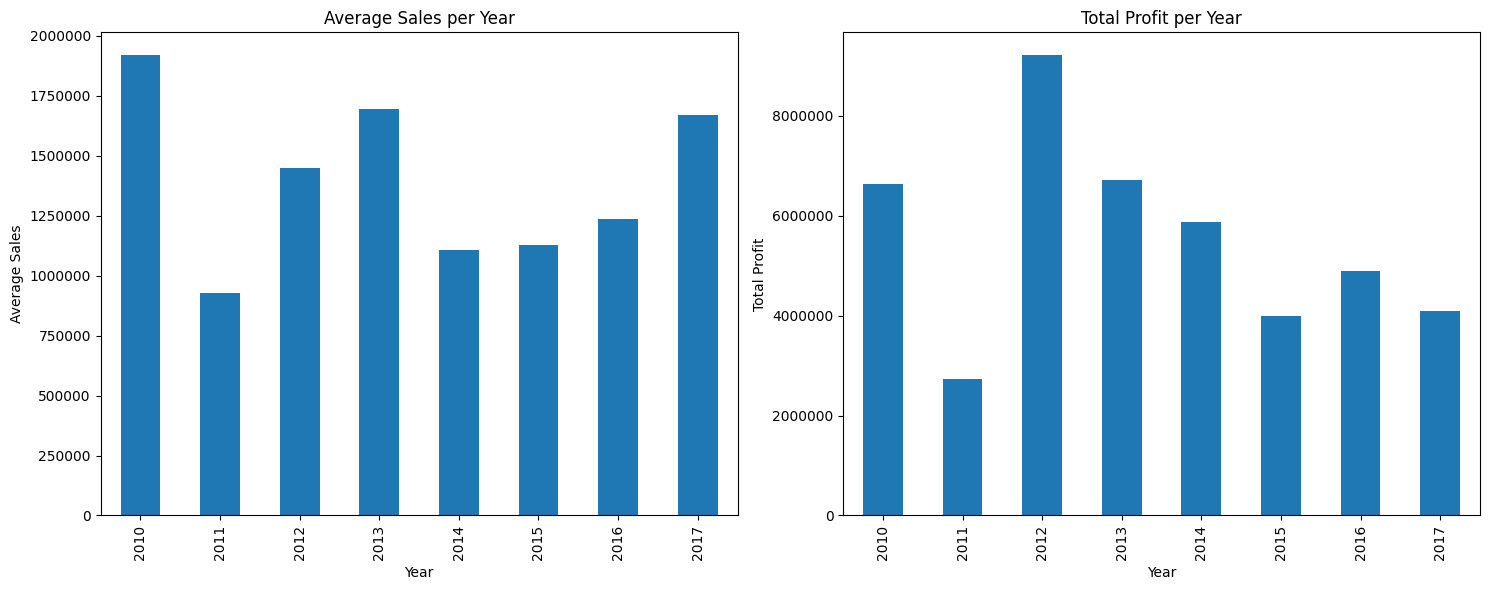

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.ticklabel_format(style='plain')
average_sales.plot(kind='bar',title='Average Sales per Year',xlabel='Year',ylabel='Average Sales')

plt.subplot(122)
plt.ticklabel_format(style='plain')
total_profit.plot(kind='bar',title='Total Profit per Year',xlabel='Year',ylabel='Total Profit')
plt.tight_layout()
plt.show()

In [18]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Date,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05-28,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08-22,2012,8
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05-02,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06-20,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02-01,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,07-26-2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72,2011-07-26,2011,7
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,2011-11-11,2011,11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,2016-06-01,2016,6
98,North America,Mexico,Personal Care,Offline,M,07-30-2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02,2015-07-30,2015,7


In [21]:
country_sales=df.groupby(['Country'])['Total Revenue'].sum().sort_values(ascending=False).head(10)

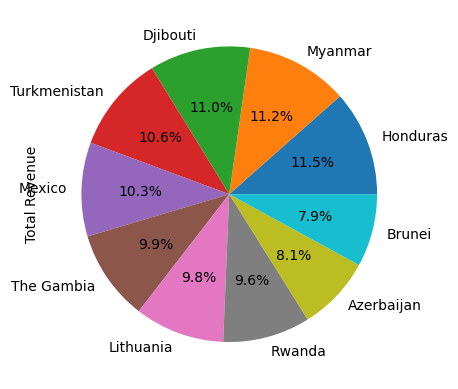

In [33]:
plt.plot(20,6)
country_sales.plot(kind="pie",autopct='%1.1f%%')
plt.show()

# This chart present the top 10 country that gives the maximum revenue. And we can clearly see that the maximum revenue is coming from Honduras.

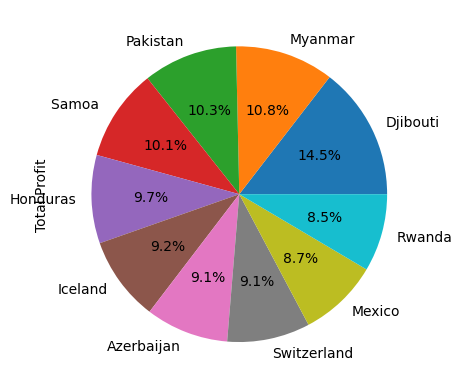

In [34]:
country_profit=df.groupby(['Country'])['Total Profit'].sum().sort_values(ascending=False).head(10)
plt.plot(15,6)
country_profit.plot(kind="pie",autopct='%1.1f%%')
plt.show()

# This chart is present the total profit of top 10 country and in this chart and we had see that the maximum revenue coming from the Honduras in previos chart but but in this chart the maximum profit is coming from Djibouti. 

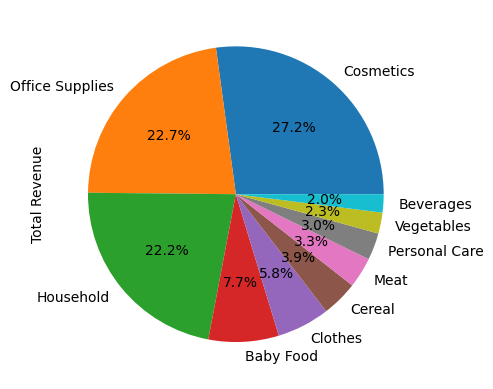

In [143]:
item_type_sales=df.groupby(['Item Type'])['Total Revenue'].sum().sort_values(ascending=False).head(10)
plt.plot(45,6)
item_type_sales.plot(kind="pie",autopct='%1.1f%%')
plt.show()

# This chart is present that the which item is gives us the most revenue and we can see that the maximum revenue is coming from cosmetics,office supplies,and household.These item is gives us the maximum revenue. 

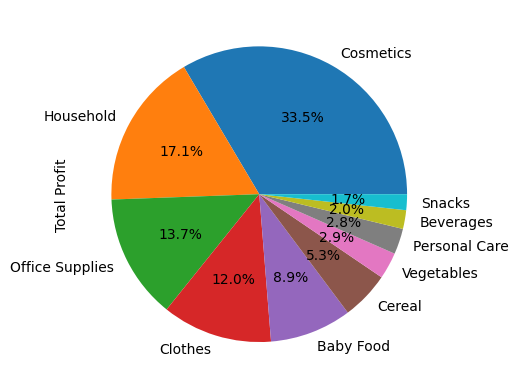

In [19]:
item_type_sales=df.groupby(['Item Type'])['Total Profit'].sum().sort_values(ascending=False).head(10)
plt.plot(45,6)
item_type_sales.plot(kind="pie",autopct='%1.1f%%')
plt.show()

# In this chart we are seeing that the which item gives us the maximum profit and we can see that the maximum profit is coming from cosmetics,household,office supplies and then clothig. 